In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

processed_data = pd.read_csv("../data/processed/final.csv")
def plot_frq_dist(attr, plot=True):
    ax1 = processed_data[attr].value_counts().sort_index()[:100].plot(kind='area')
    ax1.set(xlabel=attr, ylabel='Frequency')
    if plot is True:
        plt.show()


Frequency distribution of score1:


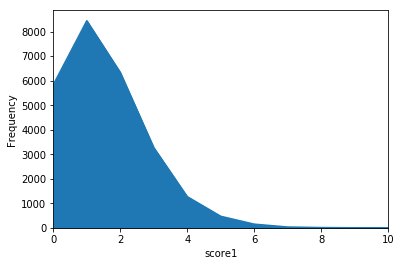

In [2]:
print "Frequency distribution of score1:"
plot_frq_dist('score1', plot=True)

Frequency distribution of score2:


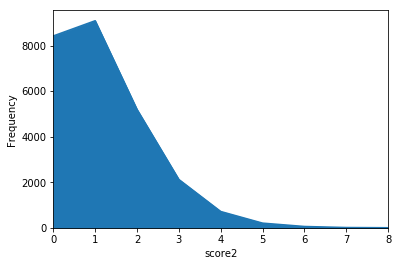

In [3]:
print "Frequency distribution of score2:"
plot_frq_dist('score2', plot=True)

Frequency distribution on team streaks related attributes:


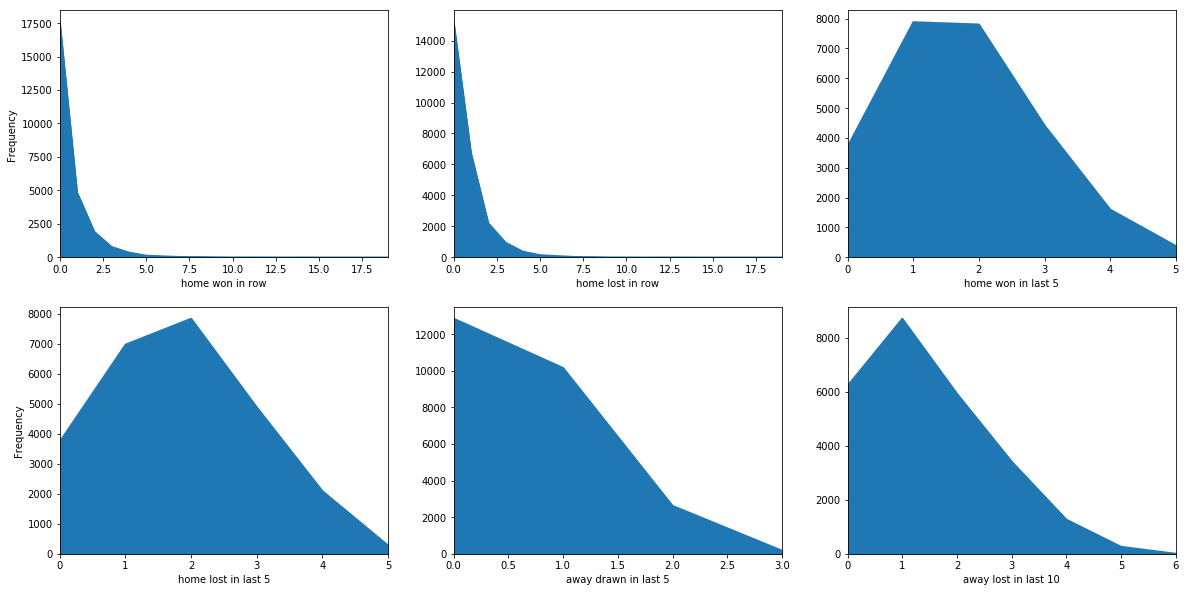

In [7]:
def plot_attrs_frq_dist(attrs, labels, rows=2, columns=3):
    for idx, attr in enumerate(attrs):
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplot(rows, columns, idx + 1)
        ax = processed_data[attr].value_counts().sort_index().plot(kind='area')
        ax.set(xlabel=labels[idx])
        if idx % columns == 0:
            ax.set_ylabel('Frequency')
    plt.show()
print "Frequency distribution on team streaks related attributes:"
attrs_streaks = ['h_won_row', 'h_lost_row', 'h_won_last_5', 'h_lst_last_5', 'a_drn_last_5', 'a_lst_last_10']
streaks_labels = ["home won in row", "home lost in row", "home won in last 5", "home lost in last 5", "away drawn in last 5", "away lost in last 10"]
plot_attrs_frq_dist(attrs_streaks, streaks_labels)

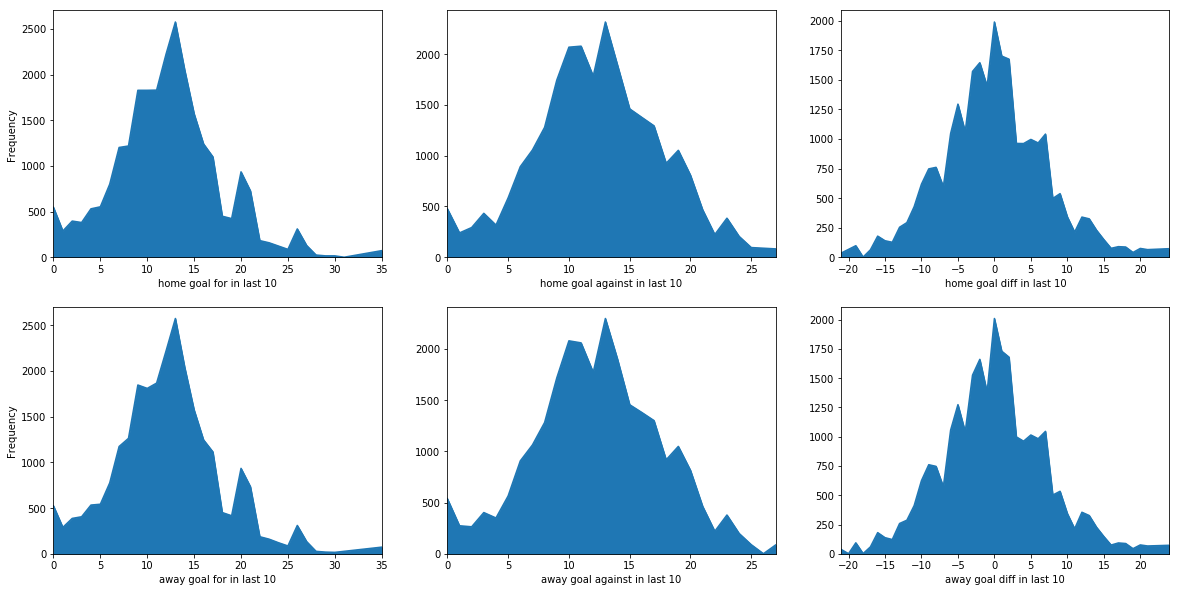

In [8]:
attrs_scores = ['h_gf_10', 'h_ga_10', 'h_gl_dif_10', 'a_gf_10', 'a_ga_10', 'a_gl_dif_10']
scores_labels = ['home goal for in last 10', 'home goal against in last 10', 'home goal diff in last 10', 'away goal for in last 10', 'away goal against in last 10', 'away goal diff in last 10']
plot_attrs_frq_dist(attrs_scores, scores_labels)

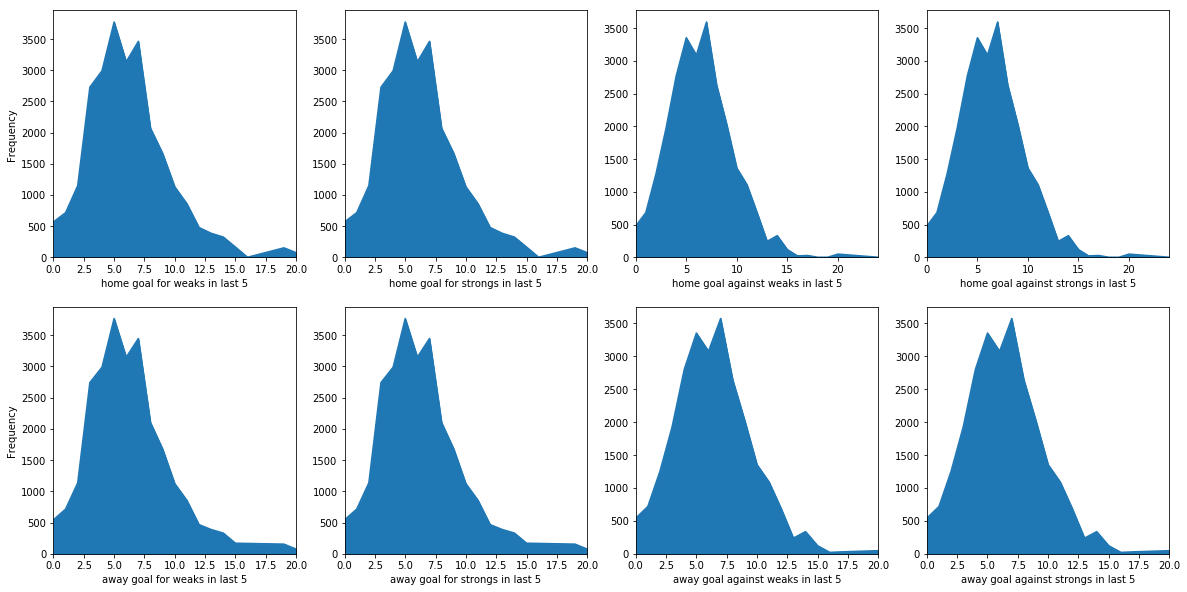

In [9]:
attr_metrics = ['h_gfw_5', 'h_gfs_5', 'h_gaw_5', 'h_gas_5', 'a_gfw_5', 'a_gfs_5', 'a_gaw_5', 'a_gas_5']
metrics_labels = ['home goal for weaks in last 5', 'home goal for strongs in last 5', 'home goal against weaks in last 5', 'home goal against strongs in last 5', 'away goal for weaks in last 5', 'away goal for strongs in last 5', 'away goal against weaks in last 5', 'away goal against strongs in last 5']
plot_attrs_frq_dist(attr_metrics, metrics_labels, 2, 4)

boxplot team spi for European main leagues:


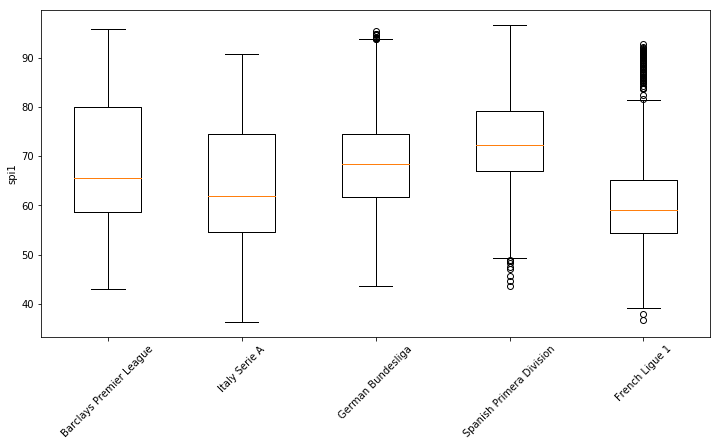

In [12]:
print "boxplot team spi for European main leagues:"
def boxplot_attr(attr):
    leagues = ['Barclays Premier League', 'Italy Serie A', 'German Bundesliga', 'Spanish Primera Division', 'French Ligue 1']
    data_to_plot = []
    for league in leagues:
        df = processed_data[processed_data.league == league][attr]
        spi_values = sorted(df.unique())
        data_to_plot.append(spi_values)

    fig = plt.figure(1, figsize=(12, 6))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(data_to_plot)
    ax.set_xticklabels(leagues)
    ax.set_ylabel(attr)
    ax.get_xaxis().tick_bottom()
    plt.xticks(rotation=45)
    plt.show()

boxplot_attr('spi1')

boxplot team attacking score for European main leagues:


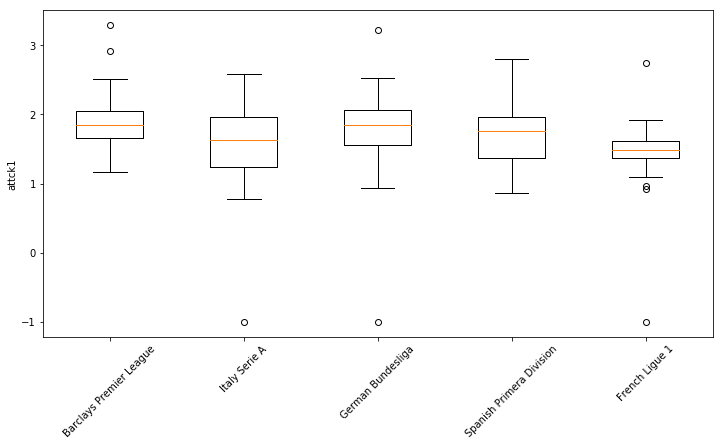

In [15]:
print "boxplot team attacking score for European main leagues:"
boxplot_attr('attck1')

boxplot team defensive score for European main leagues:


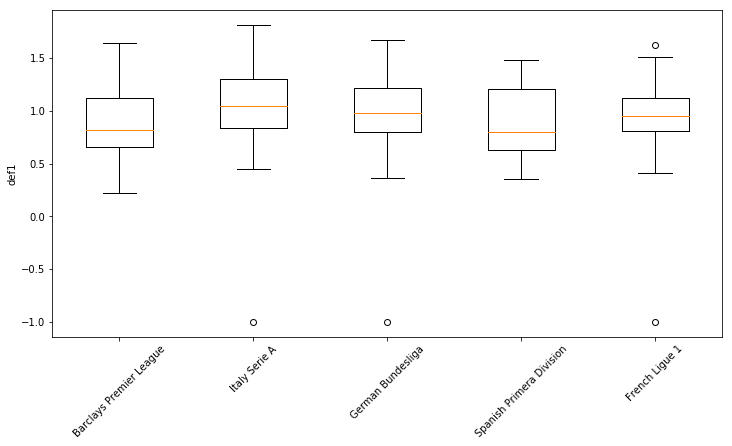

In [16]:
print "boxplot team defensive score for European main leagues:"
boxplot_attr('def1')

Pearson correlation of features:


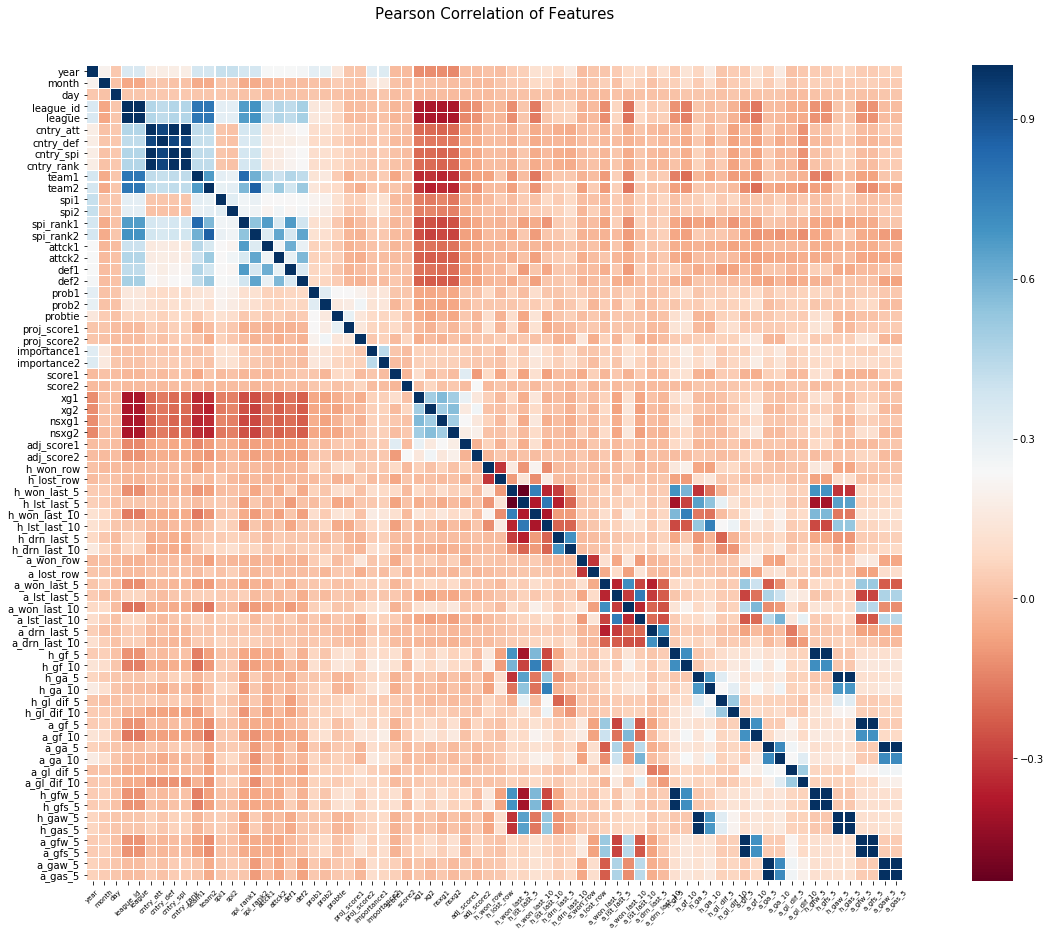

In [19]:
print "Pearson correlation of features:"
colormap = plt.cm.RdBu
plt.figure(figsize=(25, 15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(processed_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).round(decimals=2),
            linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.xticks(rotation=45, fontsize=7)

plt.show()